In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
import random
from sklearn import svm

In [2]:
data = pd.read_csv('wine-quality-white-and-red.csv')
data['quality'] = np.where(data['quality'] > 5, 1, 0)
data['wineType'] = np.where(data['type'] == "white", 1, 0)
wineData = data[['fixed acidity', 'wineType', 'volatile acidity', 'citric acid', 'total sulfur dioxide', 'pH', 'quality']].copy()
wineData.reset_index()

,index,fixed acidity,wineType,volatile acidity,citric acid,total sulfur dioxide,pH,quality
0,0,7.0,1,0.270,0.36,170.0,3.00,1
1,1,6.3,1,0.300,0.34,132.0,3.30,1
2,2,8.1,1,0.280,0.40,97.0,3.26,1
3,3,7.2,1,0.230,0.32,186.0,3.19,1
4,4,7.2,1,0.230,0.32,186.0,3.19,1
...,...,...,...,...,...,...,...,...
6492,6492,6.2,0,0.600,0.08,44.0,3.45,0
6493,6493,5.9,0,0.550,0.10,51.0,3.52,1
6494,6494,6.3,0,0.510,0.13,40.0,3.42,1
6495,6495,5.9,0,0.645,0.12,44.0,3.57,0


In [3]:
# data = pd.read_csv('UCI_Credit_Card.csv')
# data.rename(columns = {'default.payment.next.month':'defaultpayment'}, inplace = True)
# wineData = data[['BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4','PAY_AMT5','PAY_AMT6', 'defaultpayment']].copy()
# wineData.reset_index()
# data

In [4]:
# Standardize input variables

wineData['fixed acidity'] = (wineData['fixed acidity'] - wineData['fixed acidity'].mean()) / wineData['fixed acidity'].std()

wineData['volatile acidity'] = (wineData['volatile acidity'] - wineData['volatile acidity'].mean()) / wineData['volatile acidity'].std()

wineData['citric acid'] = (wineData['citric acid'] - wineData['citric acid'].mean()) / wineData['citric acid'].std()

wineData['total sulfur dioxide'] = (wineData['total sulfur dioxide'] - wineData['total sulfur dioxide'].mean()) / wineData['total sulfur dioxide'].std()

wineData['pH'] = (wineData['pH'] - wineData['pH'].mean()) / wineData['pH'].std()

# wineData['BILL_AMT4'] = (wineData['BILL_AMT4'] - wineData['BILL_AMT4'].mean()) / wineData['BILL_AMT4'].std()
# wineData['BILL_AMT5'] = (wineData['BILL_AMT5'] - wineData['BILL_AMT5'].mean()) / wineData['BILL_AMT5'].std()
# wineData['BILL_AMT6'] = (wineData['BILL_AMT6'] - wineData['BILL_AMT6'].mean()) / wineData['BILL_AMT6'].std()
# wineData['PAY_AMT1'] = (wineData['PAY_AMT1'] - wineData['PAY_AMT1'].mean()) / wineData['PAY_AMT1'].std()
# wineData['PAY_AMT2'] = (wineData['PAY_AMT2'] - wineData['PAY_AMT2'].mean()) / wineData['PAY_AMT2'].std()
# wineData['PAY_AMT3'] = (wineData['PAY_AMT3'] - wineData['PAY_AMT3'].mean()) / wineData['PAY_AMT3'].std()
# wineData['PAY_AMT4'] = (wineData['PAY_AMT4'] - wineData['PAY_AMT4'].mean()) / wineData['PAY_AMT4'].std()
# wineData['PAY_AMT5'] = (wineData['PAY_AMT5'] - wineData['PAY_AMT5'].mean()) / wineData['PAY_AMT5'].std()
# wineData['PAY_AMT6'] = (wineData['PAY_AMT6'] - wineData['PAY_AMT6'].mean()) / wineData['PAY_AMT6'].std()

In [5]:
wineData = wineData[wineData['total sulfur dioxide'] < 2]
wineData = wineData[wineData['volatile acidity'] < 4]
wineData

,fixed acidity,wineType,volatile acidity,citric acid,total sulfur dioxide,pH,quality
0,-0.166076,1,-0.423150,0.284664,0.959902,-1.358944,1
1,-0.706019,1,-0.240931,0.147035,0.287595,0.506876,1
2,0.682405,1,-0.362411,0.559923,-0.331634,0.258100,1
3,-0.011807,1,-0.666110,0.009405,1.242978,-0.177258,1
4,-0.011807,1,-0.666110,0.009405,1.242978,-0.177258,1
...,...,...,...,...,...,...,...
6492,-0.783154,0,1.581266,-1.642146,-1.269324,1.439786,0
6493,-1.014558,0,1.277566,-1.504517,-1.145479,1.875144,1
6494,-0.706019,0,1.034607,-1.298073,-1.340094,1.253204,1
6495,-1.014558,0,1.854595,-1.366888,-1.269324,2.186114,0


In [6]:
def getPrecision(lm, X, y):
    
    y_pred = lm.predict(X)

    p,r,f,s = precision_recall_fscore_support(y, y_pred, zero_division=1)
    
    return [p,r,f,s]

In [7]:
import random
from sklearn.linear_model import LogisticRegression


def plotTheGraph(label_a, label_b):
    
    X = wineData[[label_a, label_b]]
    y = wineData.quality

    max_values = [0, 0, 0, 0, 0]
    
    for i in range(1, 11):
        a = i/10.0
        for j in range(1, 11):
            b = j/10.0        
            lm = LogisticRegression(class_weight={0:a, 1:b})
            lm.fit(X, y)
            value = getPrecision(lm, X, y)
            if max_values[0] < value[0][0] and value[0][0] != 1:
                max_values[0] = value[0][0]
                max_values[1] = a
                max_values[2] = b
                max_values[3] = value
                max_values[4] = lm

    if(max_values[3] != 0 and max_values[3][0][0] > 0.90):
        print(max_values)
        print(label_a, label_b)

        lm = max_values[4]
        if(lm != 0):
            color = ['r' if y_ == 0 else 'b' for y_ in y]
            plt.scatter(wineData[label_a], wineData[label_b], c=color, s=3)
            plt.xlabel(label_a)
            plt.ylabel(label_b)

            # Plot random points colored by predicted value
            b0 = lm.intercept_
            b = lm.coef_[0]

            # Plot random points colored by prediction

            n = 5000
            newx = [random.uniform(-2,2) for _ in range(n)]
            newy = [random.uniform(-2.5,2.5) for _ in range(n)]
            df_temp = pd.DataFrame({label_a:newx, label_b:newy})
            newlabel = lm.predict(df_temp)

            color = ['r' if y_ == 0 else 'b' for y_ in newlabel]
            plt.figure()
            plt.scatter(newx, newy, c=color, marker='o', s=3)
            plt.xlabel(label_a)
            plt.ylabel(label_b)

            # Show original data
            color = ['r' if y_ == 0 else 'b' for y_ in y]
            plt.scatter(wineData[label_a], wineData[label_b], c=color, s=3)

            b0 = lm.intercept_[0]
            b = lm.coef_[0]

            Xdb = [-1.8, 1.8]
            ydb = [-(b0+b[0]*x)/b[1] for x in Xdb]
            plt.plot(Xdb, ydb)
            plt.xlabel(label_a)
            plt.ylabel(label_b)


            plt.figure()
            color = ['r' if y_ == 0 else 'b' for y_ in y]
            plt.scatter(wineData[label_a], wineData[label_b], c=color, s=8)

            b0 = lm.intercept_[0]
            b = lm.coef_[0]

            Xdb = [-1.8, 1.8]
            ydb = [-(b0+b[0]*x)/b[1] for x in Xdb]
            plt.plot(Xdb, ydb)
            plt.xlabel(label_a)
            plt.ylabel(label_b)

In [8]:
# columns = ['BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4','PAY_AMT5','PAY_AMT6','defaultpayment']
# columns = ['fixed acidity', 'wineType', 'volatile acidity', 'citric acid', 'total sulfur dioxide', 'pH']
# for i in range(len(columns)):
#     for j in range(i+1, len(columns)):
#         col = [columns[i], columns[j]]
#         plotTheGraph(columns[i], columns[j])

# [0.875, 0.2, 0.9, [array([0.875     , 0.22137991]), array([0.00209724, 0.99894515]), array([0.00418446, 0.36243849]), array([23364,  6636])], LogisticRegression(class_weight={0: 0.2, 1: 0.9})]
# BILL_AMT4 BILL_AMT5

# [0.8421052631578947, 0.2, 1.0, [array([0.84210526, 0.22124012]), array([6.84814244e-04, 9.99547920e-01]), array([0.00136852, 0.36229074]), array([23364,  6636])], LogisticRegression(class_weight={0: 0.2, 1: 1.0})]
# BILL_AMT4 BILL_AMT6

# BILL_AMT5 BILL_AMT6
# [0.9239302694136292, 0.1, 0.8, [array([0.92393027, 0.22431816]), array([0.02495292, 0.99276673]), array([0.04859346, 0.36594917]), array([23364,  6636])], LogisticRegression(class_weight={0: 0.1, 1: 0.8})]

# [0.9285714285714286, 0.1, 0.7, [array([0.92857143, 0.22448562]), array([0.02559493, 0.99306811]), array([0.04981673, 0.36619249]), array([23364,  6636])], LogisticRegression(class_weight={0: 0.1, 1: 0.7})]
# BILL_AMT4 PAY_AMT2

# , 0.36594917]), array([23364,  6636])], LogisticRegression(class_weight={0: 0.1, 1: 0.8})]
# BILL_AMT5 PAY_AMT1
# label_a = col[0]
# label_b = col[1] 

# X = wineData[col]
# y = wineData.quality

# lm = LinearRegression()
# lm.fit(X, y)

# print(lm.intercept_)
# print(lm.coef_)


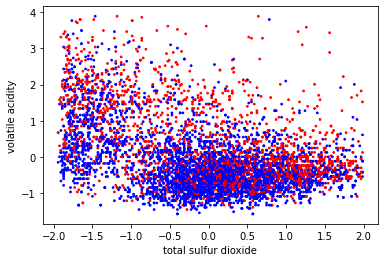

In [9]:
X = wineData[['total sulfur dioxide', 'volatile acidity']]
y = wineData.quality

lm = LogisticRegression(class_weight={0:0.1, 1:1.0})
lm.fit(X, y)

color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(wineData['total sulfur dioxide'], wineData['volatile acidity'], c=color, s=3)
plt.xlabel('total sulfur dioxide')
plt.ylabel('volatile acidity')

# Plot random points colored by predicted value
b0 = lm.intercept_
b = lm.coef_[0]

# Plot random points colored by prediction

n = 5000
newx = [random.uniform(-40,50) for _ in range(n)]
newy = [random.uniform(-40,70) for _ in range(n)]
df_temp = pd.DataFrame({'total sulfur dioxide':newx, 'volatile acidity':newy})
newlabel = lm.predict(df_temp)


Text(0, 0.5, 'volatile acidity')

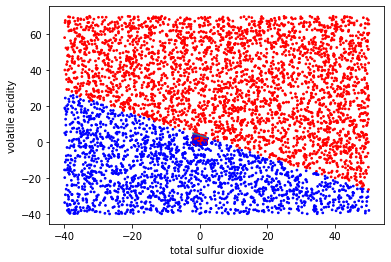

In [10]:
color = ['r' if y_ == 0 else 'b' for y_ in newlabel]
plt.figure()
plt.scatter(newx, newy, c=color, marker='o', s=3)
plt.xlabel('total sulfur dioxide')
plt.ylabel('volatile acidity')

# Show original data
color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(wineData['total sulfur dioxide'], wineData['volatile acidity'], c=color, s=3)

b0 = lm.intercept_[0]
b = lm.coef_[0]

Xdb = [-2, 2]
ydb = [-(b0+b[0]*x)/b[1] for x in Xdb]
plt.plot(Xdb, ydb)
plt.xlabel('total sulfur dioxide')
plt.ylabel('volatile acidity')

[array([0.85714286, 0.63752162]), array([0.00259628, 0.99975339]), array([0.00517688, 0.77856731]), array([2311, 4055])]


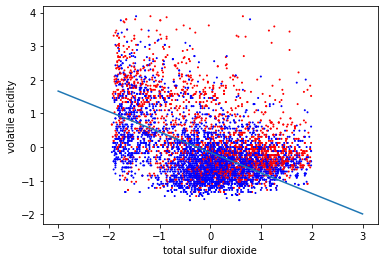

In [11]:
'total sulfur dioxide', 'volatile acidity'

plt.figure()
color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(wineData['total sulfur dioxide'], wineData['volatile acidity'], c=color, s=1)

b0 = lm.intercept_[0] - 3
b = lm.coef_[0]

Xdb = [-3, 3]
ydb = [-(b0+b[0]*x)/b[1] for x in Xdb]
plt.plot(Xdb, ydb)
plt.xlabel('total sulfur dioxide')
plt.ylabel('volatile acidity')

value = getPrecision(lm, X, y)
print(value)

'precision = [0.69635628 0.65043308]'

'recall = [0.07442666 0.98150432]'

'f-score = [0.13448006 0.78238648]'

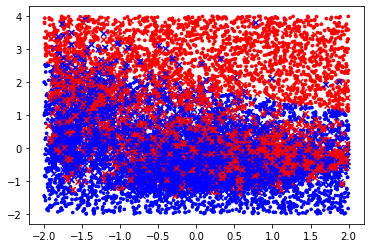

In [12]:
X = wineData[["total sulfur dioxide", "volatile acidity"]]
y = wineData.quality

clf = svm.SVC(kernel='linear', class_weight={0: 9, 1: 10})
clf.fit(X, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred, zero_division=1)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

import random
n = 5000
newx = [random.uniform(-2,2) for _ in range(n)]
newy = [random.uniform(-2,4) for _ in range(n)]
df_temp = pd.DataFrame({'total sulfur dioxide':newx,'volatile acidity':newy})
newlabel = clf.predict(df_temp)

color = ['r' if y_ == 0 else 'b' for y_ in newlabel]
plt.scatter(newx, newy, c=color, marker='o', s=7);

color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(wineData['total sulfur dioxide'], wineData['volatile acidity'], c=color, s=30, marker='x')

'precision = [0.94444444 0.63862634]'

'recall = [0.00735612 0.99975339]'

'f-score = [0.01459854 0.77939056]'

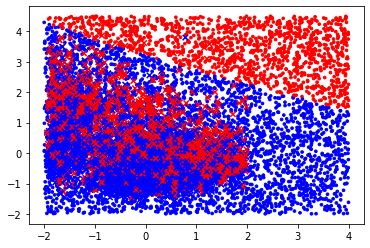

In [18]:
import numpy as np
from sklearn.svm import SVC


X = wineData[["total sulfur dioxide", "volatile acidity"]]
y = wineData.quality

clf = SVC(kernel='poly', degree=3 , class_weight={0: 3, 1: 6})
clf.fit(X, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred,zero_division=1)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

# add random points
import random
n = 5000
newx = [random.uniform(-2,4) for _ in range(n)]
newy = [random.uniform(-2,4.5) for _ in range(n)]
df_temp = pd.DataFrame({'total sulfur dioxide':newx,'volatile acidity':newy})
newlabel = clf.predict(df_temp)

color = ['r' if y_ == 0 else 'b' for y_ in newlabel]
plt.scatter(newx, newy, c=color, marker='o', s=7);

color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(wineData['total sulfur dioxide'], wineData['volatile acidity'], c=color, s=30, marker='x')

In [14]:

# possible_values = []
# max_value = [0,0,0,0]
# # Load the dataset and split into features and target
# X = wineData[["total sulfur dioxide", "volatile acidity"]]
# y = wineData.quality

# # Compute the class frequencies
# class_freq = np.bincount(y)

# # Initialize the minimum and maximum weights
# min_weight = 1
# max_weight = 10

# # Initialize the step size for weights
# step = 1

# # Loop over all possible combinations of class weights
# for i in np.arange(min_weight, max_weight + step, step):
#     for j in np.arange(min_weight, max_weight + step, step):
#         # Compute the class weights
#         class_weight = {0: i, 1: j}
        
#         # Initialize the classifier with the computed class weights
#         clf = SVC(kernel='linear' , class_weight=class_weight)

#         # Train the classifier on the data
#         clf.fit(X, y)

#         # Evaluate the classifier on the data
#         y_pred = clf.predict(X)
#         p, r, f, s = precision_recall_fscore_support(y, y_pred, zero_division=1)
#         print(p[0])
#         # Print the class weights and evaluation metrics
#         if(p[0] != 1):
#             print('Class weights: ', class_weight)
#             print('Precision = {}, Recall = {}, F-score = {}'.format(p, r, f))
#             possible_values.append([p, r, f])
#             if(max_value[0] < f[0]):
#                 max_value[0] = f[0]
#                 max_value[1] = p
#                 max_value[2] = r
#                 max_value[3] = f
#             print()
# print("max_value")         
# print(max_value)


Precision = [0.93640777 0.91128658], Recall = [0.83470359 0.9676942 ], F-score = [0.88263555 0.9386437 ]


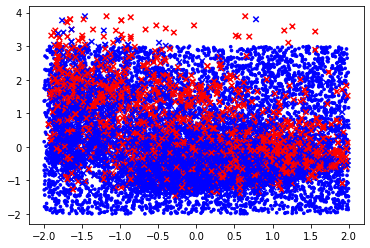

In [15]:
import numpy as np
from sklearn.svm import SVC
import random

# Load the dataset and split into features and target
X = wineData[["total sulfur dioxide", "volatile acidity"]]
y = wineData.quality

# Compute the class frequencies
class_freq = np.bincount(y)

# Initialize the classifier with the computed class weights
clf = svm.SVC(kernel='rbf', gamma=5000)

# Train the classifier on the data
clf.fit(X, y)

# Evaluate the classifier on the data
y_pred = clf.predict(X)
p, r, f, s = precision_recall_fscore_support(y, y_pred, zero_division=1)

print('Precision = {}, Recall = {}, F-score = {}'.format(p, r, f))


import random
n = 5000
newx = [random.uniform(-2,2) for _ in range(n)]
newy = [random.uniform(-2,3) for _ in range(n)]
df_temp = pd.DataFrame({'total sulfur dioxide':newx,'volatile acidity':newy})
newlabel = clf.predict(df_temp)

color = ['r' if y_ == 0 else 'b' for y_ in newlabel]
plt.scatter(newx, newy, c=color, marker='o', s=7);

color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(wineData['total sulfur dioxide'], wineData['volatile acidity'], c=color, s=30, marker='x')

In [16]:
X = wineData[["total sulfur dioxide", "volatile acidity"]]
y = wineData.quality

clf = SVC(kernel='poly', degree=3 , class_weight={0: 1, 1: 2})
clf.fit(X, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
print("class_weight value 1")
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))


clf = SVC(kernel='poly', degree=3 , class_weight={0: 2, 1: 4})
clf.fit(X, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
print("class_weight value 2")
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))


clf = SVC(kernel='poly', degree=3 , class_weight={0: 3, 1: 6})
clf.fit(X, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
print("class_weight value 3")
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))


clf = SVC(kernel='poly', degree=3 , class_weight={0: 4, 1: 8})
clf.fit(X, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
print("class_weight value 4")
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))



clf = SVC(kernel='poly', degree=3 , class_weight={0: 5, 1: 10})
clf.fit(X, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
print("class_weight value 5")
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))



clf = SVC(kernel='poly', degree=3 , class_weight={0: 6, 1: 12})
clf.fit(X, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
print("class_weight value 6")
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

class_weight value 1


'precision = [0.94444444 0.63862634]'

'recall = [0.00735612 0.99975339]'

'f-score = [0.01459854 0.77939056]'

class_weight value 2


'precision = [0.94444444 0.63862634]'

'recall = [0.00735612 0.99975339]'

'f-score = [0.01459854 0.77939056]'

class_weight value 3


'precision = [0.94444444 0.63862634]'

'recall = [0.00735612 0.99975339]'

'f-score = [0.01459854 0.77939056]'

'precision = [0.94444444 0.63862634]'

'recall = [0.00735612 0.99975339]'

'f-score = [0.01459854 0.77939056]'

class_weight value 4


'precision = [0.94444444 0.63862634]'

'recall = [0.00735612 0.99975339]'

'f-score = [0.01459854 0.77939056]'

class_weight value 5


'precision = [0.94444444 0.63862634]'

'recall = [0.00735612 0.99975339]'

'f-score = [0.01459854 0.77939056]'